Initial Dataset:
     Student_ID Gender  Math_Score  English_Score  Science_Score  \
0            1      M        88.0           78.0             90   
1            2      F        92.0           85.0             89   
2            3      F        85.0           79.0             94   
3            4      M        90.0           83.0             85   
4            5      F        95.0           80.0             92   
5            6      M        45.0           76.0             67   
6            7      F        77.0           72.0             78   
7            8      F         NaN           69.0             80   
8            9      M        99.0           88.0             95   
9           10      M        52.0           59.0             72   
10          11      F        65.0            NaN             60   
11          12      F        84.0           74.0             86   
12          13      M        74.0           65.0             69   
13          14      F        88.0           

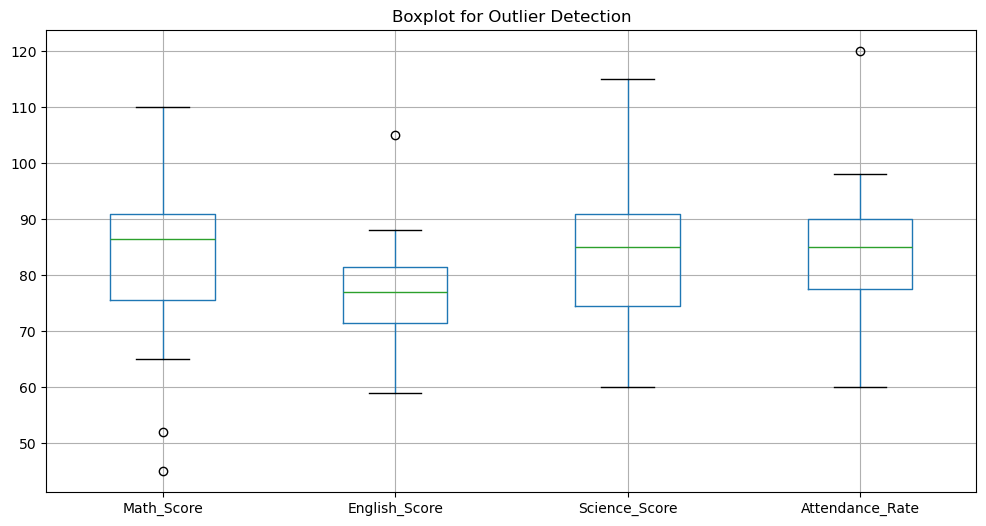


After handling outliers:
        Math_Score  English_Score  Science_Score  Attendance_Rate
count   15.000000      15.000000      15.000000        15.000000
mean    82.533333      76.833333      83.266667        84.316667
std     16.157944       9.326741      13.729357        12.203800
min     52.250000      59.000000      60.000000        60.000000
25%     75.500000      71.500000      74.500000        77.500000
50%     86.500000      77.000000      85.000000        85.000000
75%     91.000000      81.500000      91.000000        90.000000
max    110.000000      96.500000     115.000000       108.750000


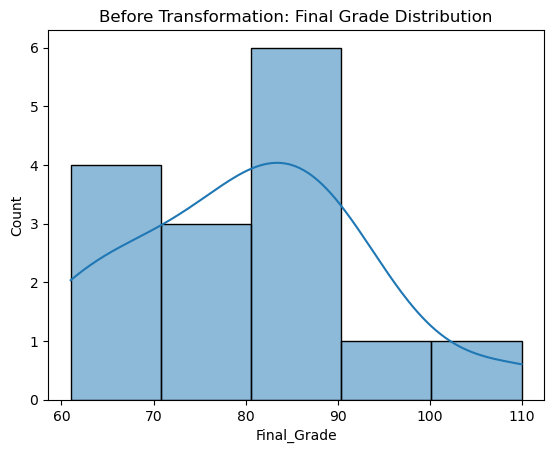

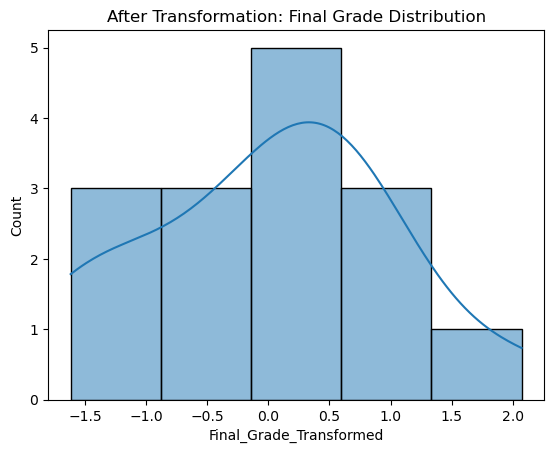


Final Dataset after Transformation and Normalization:
    Student_ID Gender  Math_Score  English_Score  Science_Score  \
0           1      M    0.619048       0.506667       0.545455   
1           2      F    0.688312       0.693333       0.527273   
2           3      F    0.567100       0.533333       0.618182   
3           4      M    0.653680       0.640000       0.454545   
4           5      F    0.740260       0.560000       0.581818   

   Attendance_Rate  Final_Grade  Final_Grade_Transformed  
0         0.615385     0.496599                 0.450393  
1         0.717949     0.564626                 0.692031  
2         0.512821     0.510204                 0.499376  
3         0.410256     0.510204                 0.499376  
4         0.779487     0.571429                 0.715754  


In [3]:
# ------------------------------------------------------------------------------------
# PR 02
# Problem Statement: Data Wrangling II
#
# Create an “Academic performance” dataset of students and perform the following 
# operations using Python:
#
# 1. Scan all variables for missing values and inconsistencies. If there are missing 
#    values and/or inconsistencies, use any of the suitable techniques to deal with them.
#
# 2. Scan all numeric variables for outliers. If there are outliers, use any of the 
#    suitable techniques to deal with them.
#
# 3. Apply data transformations on at least one of the variables. The purpose of this 
#    transformation should be one of the following:
#    - to change the scale for better understanding of the variable,
#    - to convert a non-linear relation into a linear one,
#    - or to decrease the skewness and convert the distribution into a normal distribution.
# ------------------------------------------------------------------------------------

# Step 1: Import necessary libraries
import pandas as pd                          # For data handling and manipulation
import numpy as np                           # For numerical operations
import seaborn as sns                        # For data visualization
import matplotlib.pyplot as plt              # For plotting graphs
from sklearn.preprocessing import MinMaxScaler, PowerTransformer  # For normalization and transformation

# Step 2: Create a sample dataset manually (not from CSV)
data = {
    "Student_ID": range(1, 16),  # Student IDs 1 to 15
    "Gender": ['M', 'F', 'F', 'M', 'F', 'M', 'F', 'F', 'M', 'M', 'F', 'F', 'M', 'F', 'M'],
    "Math_Score": [88, 92, 85, 90, 95, 45, 77, np.nan, 99, 52, 65, 84, 74, 88, 110],  # Includes missing and extreme value
    "English_Score": [78, 85, 79, 83, 80, 76, 72, 69, 88, 59, np.nan, 74, 65, 71, 105],  # Includes missing and extreme value
    "Science_Score": [90, 89, 94, 85, 92, 67, 78, 80, 95, 72, 60, 86, 69, 77, 115],  # Outlier in Science
    "Attendance_Rate": [90, 95, 85, 80, 98, 70, 85, 88, np.nan, 60, 75, 85, 70, 90, 120]  # Includes missing and outlier
}

# Convert dictionary to DataFrame
df = pd.DataFrame(data)

# Step 3: Compute final grade by averaging scores from three subjects
df['Final_Grade'] = df[['Math_Score', 'English_Score', 'Science_Score']].mean(axis=1)

# Display the initial dataset
print("Initial Dataset:\n", df)

# Step 4: Check for missing values in each column
print("\nMissing values in each column:\n", df.isnull().sum())

# Step 5: Handle missing values using median imputation
df.fillna(df.median(numeric_only=True), inplace=True)  # Fills missing numeric values with median

# Verify that no missing values remain
print("\nAfter handling missing values:\n", df.isnull().sum())

# Step 6: Visualize outliers using boxplot
plt.figure(figsize=(12, 6))
df[['Math_Score', 'English_Score', 'Science_Score', 'Attendance_Rate']].boxplot()
plt.title("Boxplot for Outlier Detection")
plt.show()

# Step 7: Handle outliers using IQR method (capping technique)
for col in ['Math_Score', 'English_Score', 'Science_Score', 'Attendance_Rate']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    # Replace values beyond IQR with boundary values
    df[col] = np.where(df[col] > upper, upper,
              np.where(df[col] < lower, lower, df[col]))

# Display descriptive statistics after outlier treatment
print("\nAfter handling outliers:\n", df[['Math_Score', 'English_Score', 'Science_Score', 'Attendance_Rate']].describe())

# Step 8: Visualize Final_Grade before transformation
plt.figure()
sns.histplot(df['Final_Grade'], kde=True)
plt.title("Before Transformation: Final Grade Distribution")
plt.show()

# Step 9: Apply Power Transformation (Yeo-Johnson) to reduce skewness
transformer = PowerTransformer(method='yeo-johnson')  # Works with both positive and zero/negative values
df['Final_Grade_Transformed'] = transformer.fit_transform(df[['Final_Grade']])

# Step 10: Visualize Final Grade after transformation
plt.figure()
sns.histplot(df['Final_Grade_Transformed'], kde=True)
plt.title("After Transformation: Final Grade Distribution")
plt.show()

# Step 11: Normalize numeric columns using Min-Max scaling to range [0, 1]
scaler = MinMaxScaler()
numeric_cols = ['Math_Score', 'English_Score', 'Science_Score', 'Attendance_Rate', 'Final_Grade']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Step 12: Display final cleaned and transformed dataset
print("\nFinal Dataset after Transformation and Normalization:\n", df.head())
